In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

2024-06-01 08:57:48.620028: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data=pd.read_csv('data/BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# **Exploracion inicial**
---

In [4]:
data.shape

(10127, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### **Cantidad de nulos**
---

In [6]:
data.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

### **Descripcion de variables**
---

In [7]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [8]:
data.describe(include='O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


# **Exploracion visual**
---

<Axes: ylabel='Attrition_Flag'>

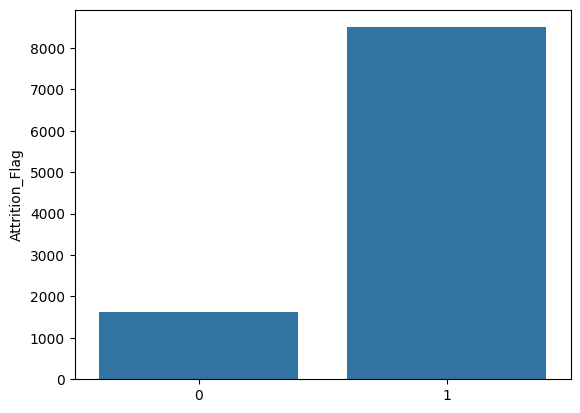

In [75]:
sns.barplot(data['Attrition_Flag'].value_counts())

Vemos que hay un gran desbalanceo, sin embargo en esta entrega no se va a tratar ya que el problema se centra en la arquitectura.

<Axes: xlabel='Customer_Age', ylabel='Count'>

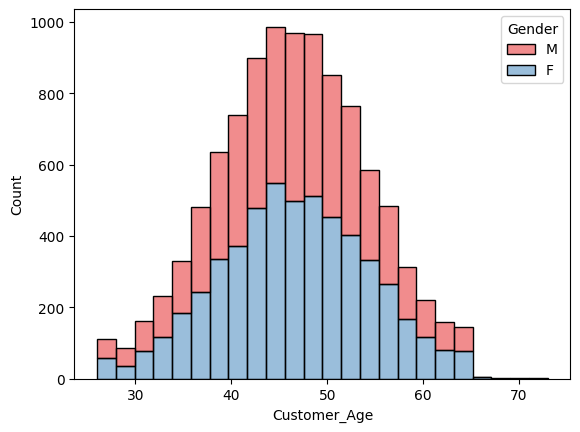

In [76]:
sns.histplot(x=data['Customer_Age'], hue=data['Gender'], palette='Set1', binwidth=2, multiple='stack', alpha=0.5)

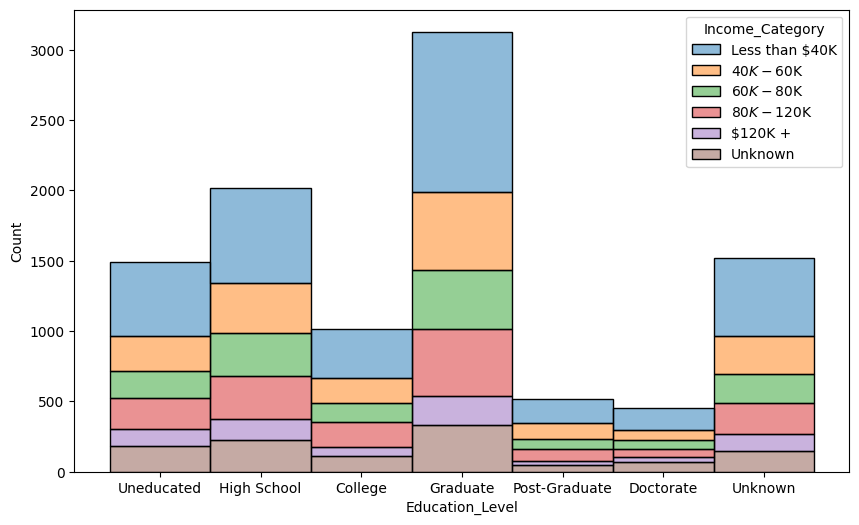

In [80]:
education_order = ["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate", "Unknown"]
income_order = ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +", "Unknown"]

data['Education_Level'] = pd.Categorical(data['Education_Level'], categories=education_order, ordered=True)
data['Income_Category'] = pd.Categorical(data['Income_Category'], categories=income_order, ordered=True)

plt.figure(figsize=(10, 6))

sns.histplot(data=data, x='Education_Level', hue='Income_Category', alpha=0.5, common_norm=False, multiple='stack')

plt.show()

<Axes: xlabel='Credit_Limit', ylabel='Count'>

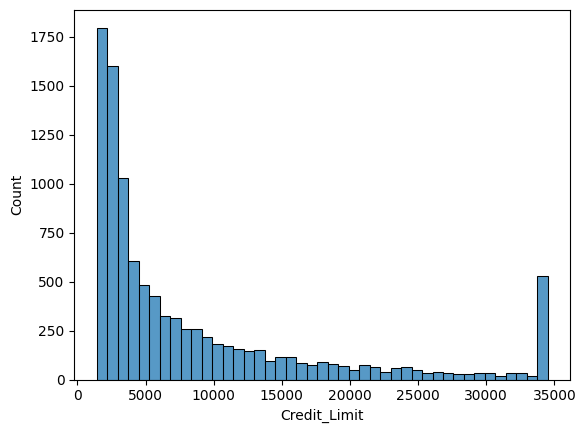

In [79]:
sns.histplot(data['Credit_Limit'])

In [9]:
map_dic={'Existing Customer':1, 'Attrited Customer':0}
data['Attrition_Flag']=data['Attrition_Flag'].map(map_dic)

# **Conversión a numérico con Onehot**
---

In [10]:
encoder = OneHotEncoder(sparse_output=False)

categorical_cols = data.select_dtypes(include='O').columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

encoded_data = encoder.fit_transform(data[categorical_cols])

encoded_columns = encoder.get_feature_names_out(categorical_cols)

df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

df_final = pd.concat([data[numerical_cols].reset_index(drop=True), df_encoded], axis=1)


In [11]:
df_final.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,1,45,3,39,5,1,3,12691.0,777,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,818770008,1,49,5,44,6,1,2,8256.0,864,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [12]:
X=df_final.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y=df_final['Attrition_Flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=True,random_state=0)

# **Modelos de clasificación**
---
### **1. Capas densas tamaño fijo con dropout**

In [13]:

def crear_modelo_denso(input_shape, num_layers=3, units_per_layer=64, dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(units_per_layer, activation='relu', input_shape=input_shape))
    
    for _ in range(num_layers - 1):
        model.add(Dense(units_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
        
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


### **2. Capas densas tamaño variable con dropout y BatchNormalization**

In [14]:

def crear_modelo_denso_avanzado(input_shape, layer_units=[128, 256, 128], dropout_rate=0.5):

    model = Sequential()
    
    for i, units in enumerate(layer_units):
        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=input_shape))
        else:
            model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
        
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


### **Creacion de los modelos prueba con 1**

In [15]:
model=crear_modelo_denso((X_train.shape[1],),1,8,.5)

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(X_train,y_train,epochs=5,validation_data=[X_test,y_test])

Epoch 1/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4356 - loss: 555.0465 - val_accuracy: 0.7887 - val_loss: 21.7904
Epoch 2/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 11.1800 - val_accuracy: 0.8485 - val_loss: 7.1507
Epoch 3/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8163 - loss: 4.7995 - val_accuracy: 0.6002 - val_loss: 5.1519
Epoch 4/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8030 - loss: 4.8067 - val_accuracy: 0.8490 - val_loss: 3.4800
Epoch 5/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8363 - loss: 2.6328 - val_accuracy: 0.5395 - val_loss: 9.3154


In [18]:
model.evaluate(X_test,y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.5375 - loss: 9.1005


[9.315447807312012, 0.5394866466522217]

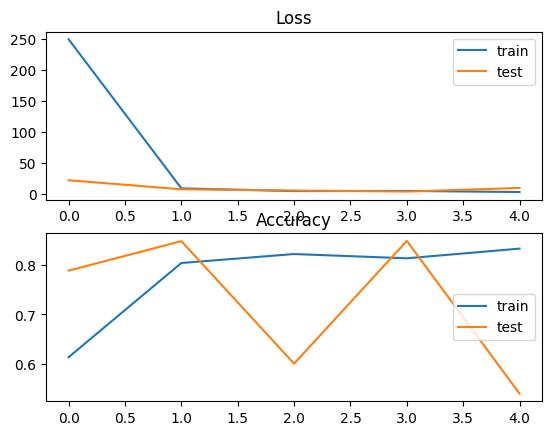

In [19]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
y_pred_classes = (pred > 0.5).astype(int).reshape(-1)  # Umbral de 0.5 para la clasificación binaria
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
sns.heatmap(cm,annot=True)

### **Creacion de los modelos prueba con 2**

In [20]:
model2=crear_modelo_denso_avanzado((X_train.shape[1],),[30,42,100,40,20],.5)

In [21]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 42)             │         1,302 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 42)             │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         4,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         4,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,611 (49.26 KB)

 Trainable params: 12,147 (47.45 KB)

 Non-trainable params: 464 (1.81 KB)

In [22]:
history=model2.fit(X_train,y_train,epochs=5,validation_data=[X_test,y_test])

Epoch 1/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5909 - loss: 0.8083 - val_accuracy: 0.8475 - val_loss: 0.4379
Epoch 2/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7760 - loss: 0.5239 - val_accuracy: 0.8475 - val_loss: 0.4124
Epoch 3/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8099 - loss: 0.4938 - val_accuracy: 0.8475 - val_loss: 0.4053
Epoch 4/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8264 - loss: 0.4555 - val_accuracy: 0.8465 - val_loss: 0.3966
Epoch 5/5
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.4402 - val_accuracy: 0.8465 - val_loss: 0.4022


In [23]:
model2.evaluate(X_test,y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.5375 - loss: 9.1005


[9.315447807312012, 0.5394866466522217]

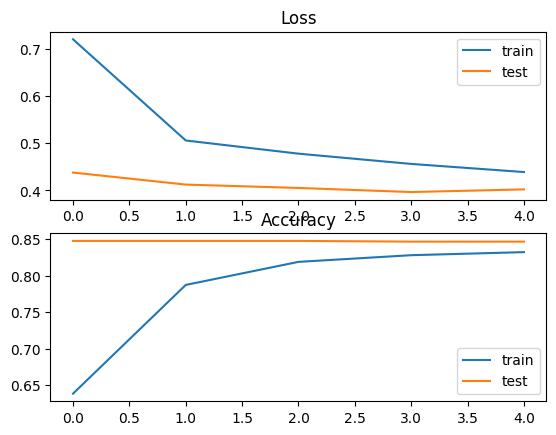

In [24]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
pred=model2.predict(X_test)
y_pred_classes = (pred > 0.5).astype(int).reshape(-1)  # Umbral de 0.5 para la clasificación binaria
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
sns.heatmap(cm,annot=True)

# **Grid Search de los modelos**
---

In [25]:
def plot_history_train(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

#### **Modelo simple**

Proposed 10 models


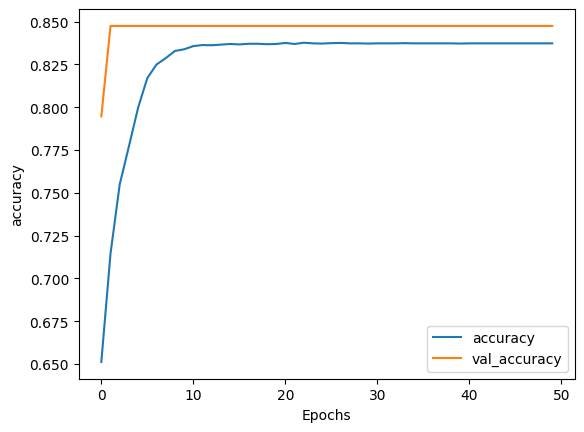

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


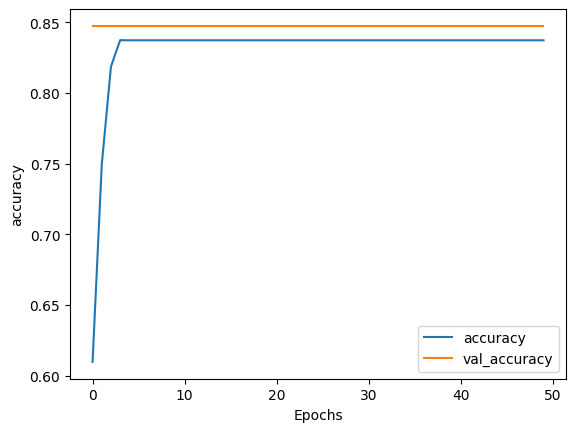

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


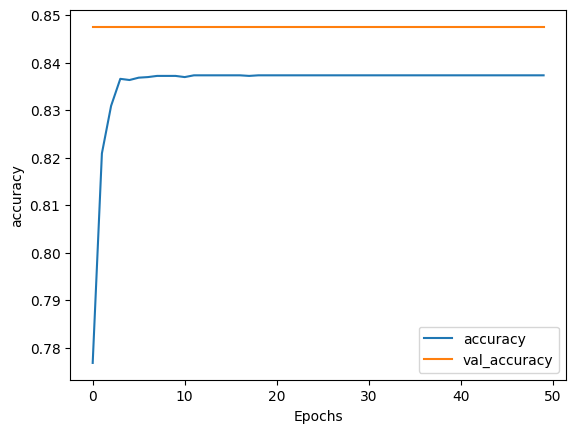

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


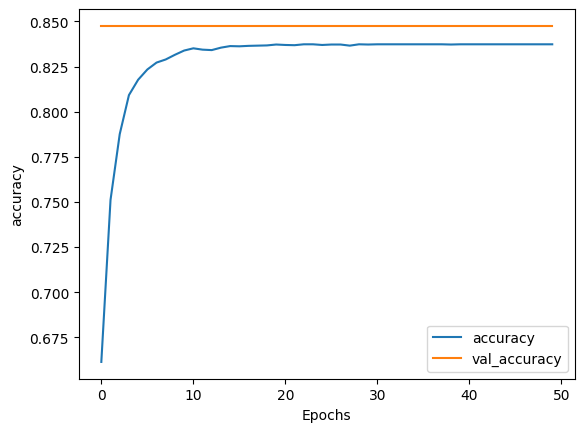

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


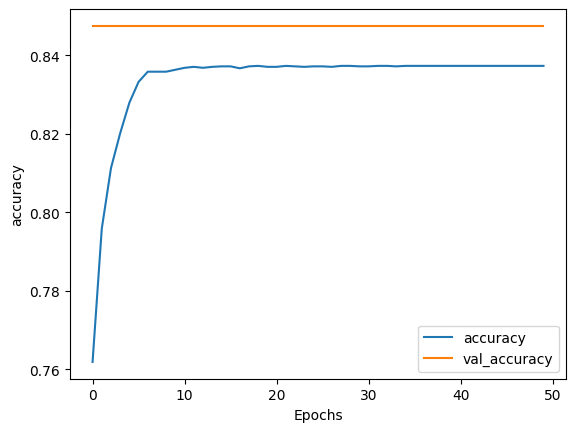

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


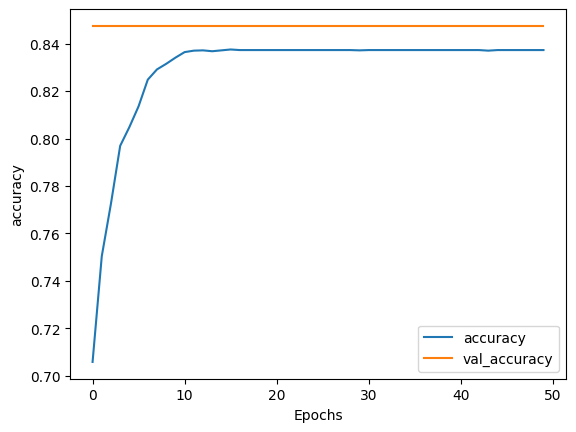

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


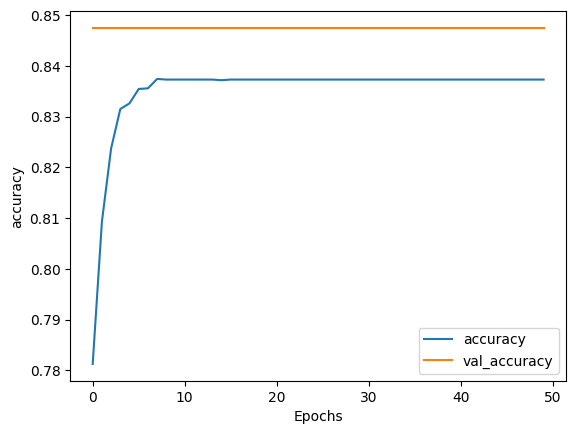

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


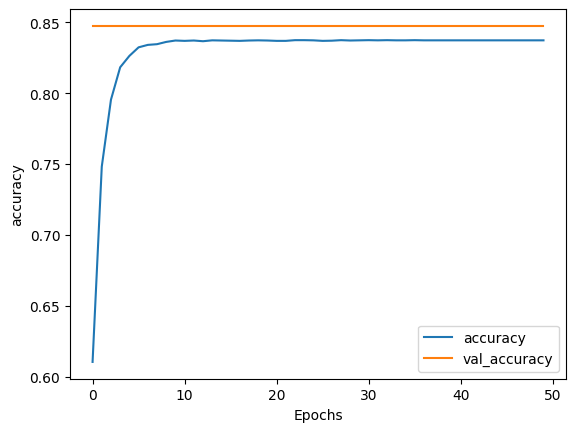

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


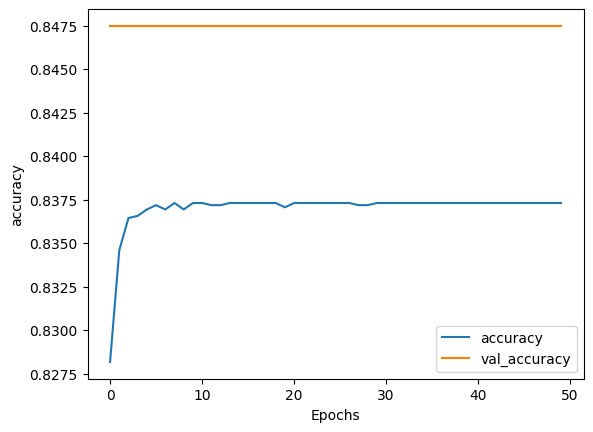

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


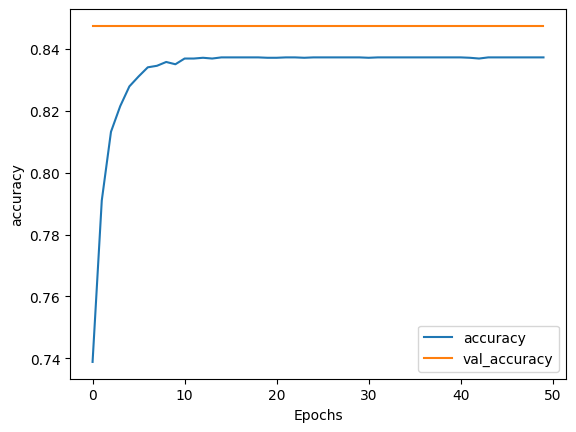

In [27]:
epochs = [50]
dense_layers = [ 6, 8,10,12,16]
dense_dropout = [0]
unit = [8,12]

# make a list of dictionaries containing every possible 
# combination in the grid as a (smaller) dictionary 
import itertools

param_grid = dict(dense_layers = dense_layers
                    , unit = unit
                    , epochs = epochs
                    , dense_dropout = dense_dropout
                 )

keys = param_grid.keys()
values = (param_grid[key] for key in keys)
param_grid = [dict(zip(keys, param_grid)) for param_grid in itertools.product(*values)]

print('Proposed ' + str(len(param_grid)) + ' models')

for j in range(0, len(param_grid)):
    
    num = param_grid[j].get("dense_layers")
    unit = param_grid[j].get("unit")
    epochs = param_grid[j].get("epochs")
    dense_dropout = param_grid[j].get("dense_dropout")
    
    model = crear_modelo_denso((X_train.shape[1],),num_layers=num,units_per_layer=unit)
    
    history = model.fit(X_train,
                        y_train,
                        epochs = epochs,
                        validation_data = (X_test, y_test), 
                        verbose = 0)
    
    plot_history_train(history, 'accuracy')
    mae = pd.DataFrame.from_dict(history.history)['val_accuracy'].iloc[-1]
    param_grid[j].update( {"val_accuracy":mae})
    
results = pd.DataFrame(param_grid)

In [28]:
results

,dense_layers,unit,epochs,dense_dropout,val_accuracy
0,6,8,50,0,0.847483
1,6,12,50,0,0.847483
2,8,8,50,0,0.847483
3,8,12,50,0,0.847483
4,10,8,50,0,0.847483
5,10,12,50,0,0.847483
6,12,8,50,0,0.847483
7,12,12,50,0,0.847483
8,16,8,50,0,0.847483
9,16,12,50,0,0.847483


### **Modelo complejo**

Proposed 10 models


/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


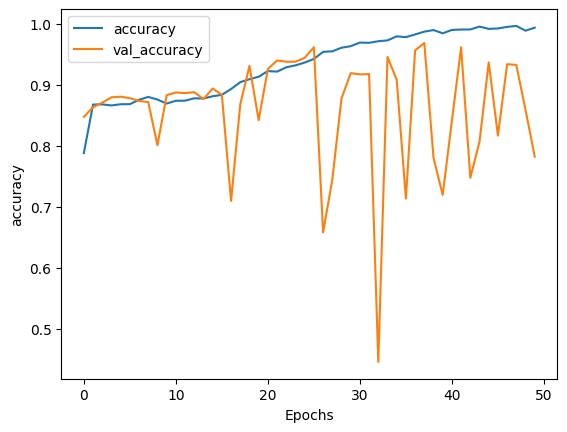

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


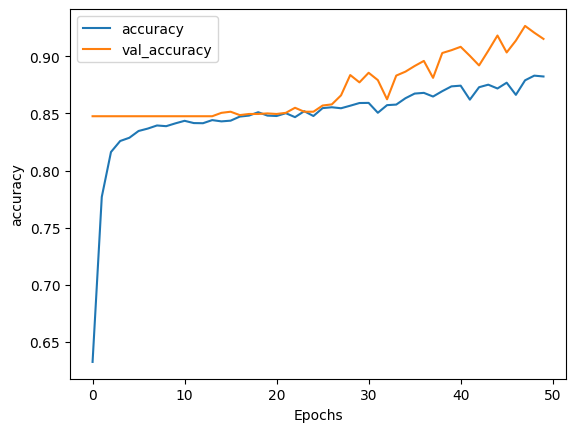

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


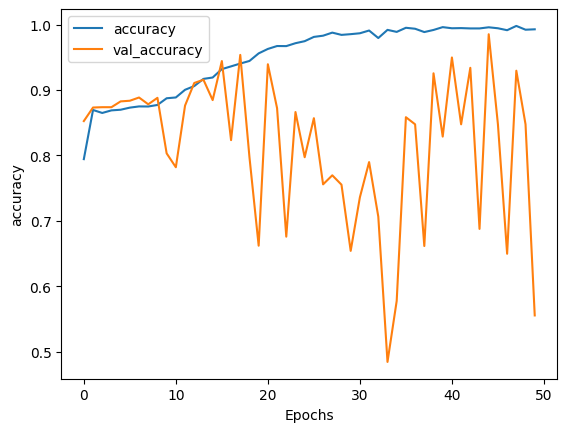

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


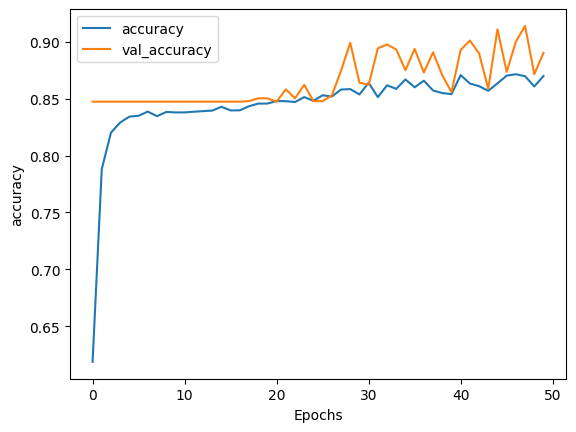

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


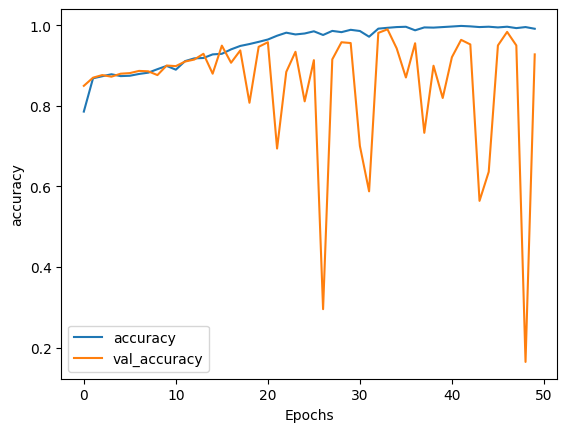

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


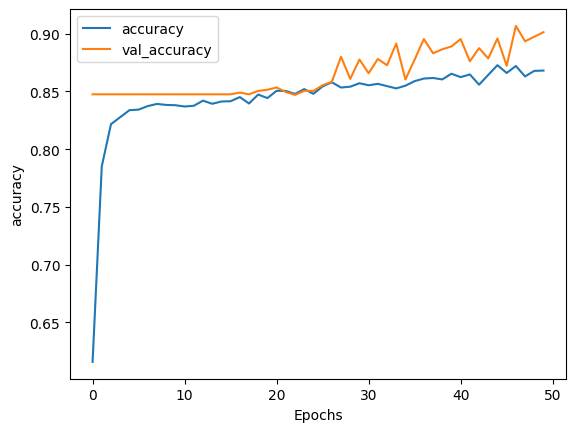

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


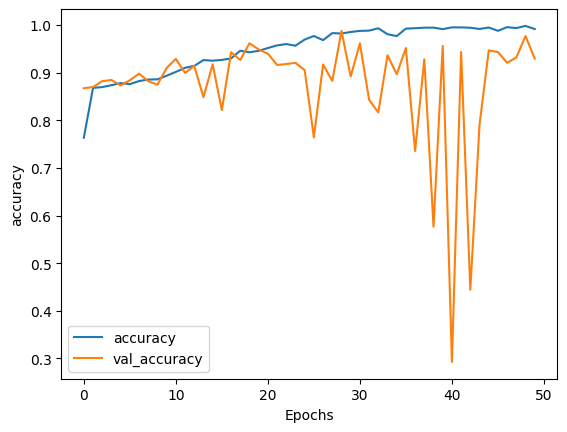

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


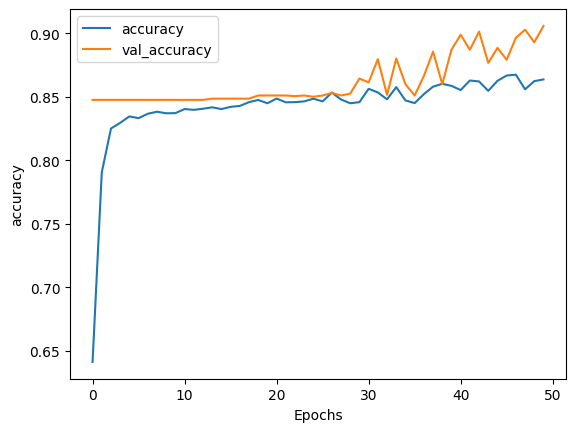

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


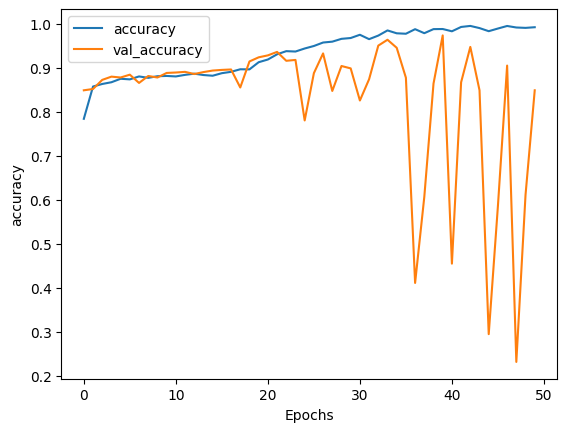

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


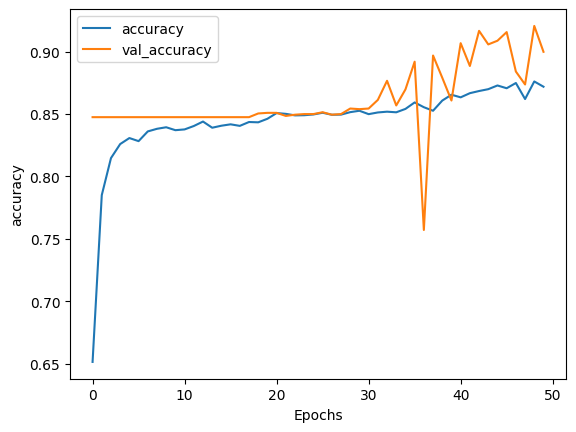

In [31]:
epochs = [50]
dense_dropout = [0,.5]
unit = [[12,16,20]]

# make a list of dictionaries containing every possible 
# combination in the grid as a (smaller) dictionary 
import itertools

param_grid = dict(
                    , unit = unit
                    , epochs = epochs
                    , dense_dropout = dense_dropout
                 )

keys = param_grid.keys()
values = (param_grid[key] for key in keys)
param_grid = [dict(zip(keys, param_grid)) for param_grid in itertools.product(*values)]

print('Proposed ' + str(len(param_grid)) + ' models')

for j in range(0, len(param_grid)):
    
    unit = param_grid[j].get("unit")
    epochs = param_grid[j].get("epochs")
    dense_dropout = param_grid[j].get("dense_dropout")
    
    model = crear_modelo_denso_avanzado((X_train.shape[1],),unit,dense_dropout)
    
    history = model.fit(X_train,
                        y_train,
                        epochs = epochs,
                        validation_data = (X_test, y_test), 
                        verbose = 0)
    
    plot_history_train(history, 'accuracy')
    mae = pd.DataFrame.from_dict(history.history)['val_accuracy'].iloc[-1]
    param_grid[j].update( {"val_accuracy":mae})
    
results = pd.DataFrame(param_grid)

In [32]:
results

,dense_layers,unit,epochs,dense_dropout,val_accuracy
0,6,"[12, 16, 20]",50,0.0,0.782330
1,6,"[12, 16, 20]",50,0.5,0.915104
2,8,"[12, 16, 20]",50,0.0,0.555281
3,8,"[12, 16, 20]",50,0.5,0.890424
4,10,"[12, 16, 20]",50,0.0,0.927443
5,10,"[12, 16, 20]",50,0.5,0.901283
6,12,"[12, 16, 20]",50,0.0,0.929418
7,12,"[12, 16, 20]",50,0.5,0.905726
8,16,"[12, 16, 20]",50,0.0,0.848963
9,16,"[12, 16, 20]",50,0.5,0.899803


La mejor combinacion es:
- [12,16,20] units
- Y 0.5 de Dropout

### **Comparando gráfica de perdidas con y sin dropout**
---

In [33]:
model = crear_modelo_denso_avanzado((X_train.shape[1],),[12,16,20],0)
    
history = model.fit(X_train,
                    y_train,
                    epochs = 50,
                    validation_data = (X_test, y_test), 
                    verbose = 0)

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


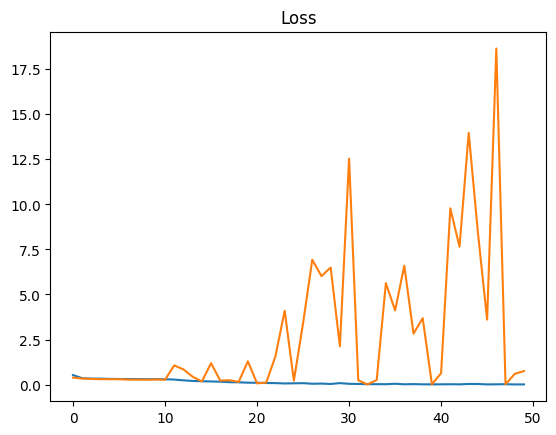

In [34]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

In [68]:
model = crear_modelo_denso_avanzado((X_train.shape[1],),[12,16,20],0.5)
    
history = model.fit(X_train,
                    y_train,
                    epochs = 50,
                    validation_data = (X_test, y_test), 
                    verbose = 0)

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


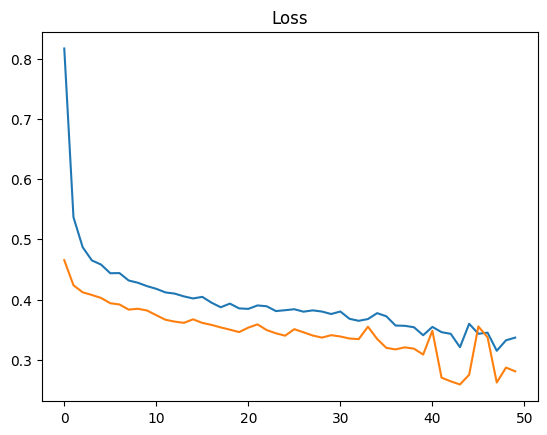

In [69]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

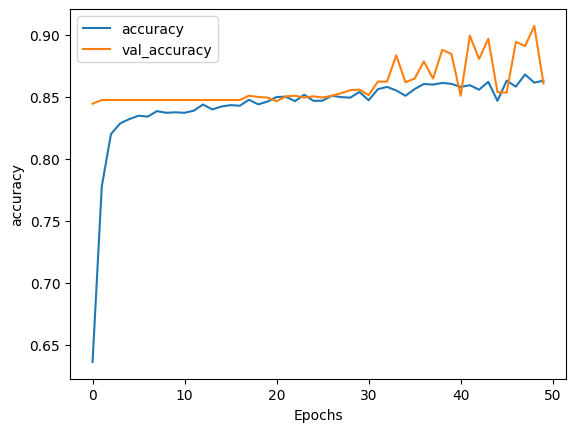

In [70]:
plot_history_train(history, 'accuracy')

In [71]:
model.evaluate(X_test,y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8580 - loss: 0.2819


[0.28089261054992676, 0.8608095049858093]

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[  27  282]
 [   0 1717]]


<Axes: >

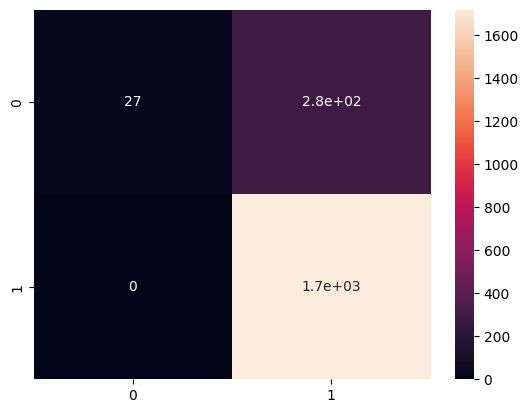

In [74]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
y_pred_classes = (pred > 0.5).astype(int).reshape(-1)  # Umbral de 0.5 para la clasificación binaria
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
sns.heatmap(cm,annot=True)

Vemos que la perdida de validacion deja de tener picos ya que evitamos el overfitting y se comporta mejor en test.

## **Feature engineering**
---

In [37]:
df_final.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,1,45,3,39,5,1,3,12691.0,777,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,818770008,1,49,5,44,6,1,2,8256.0,864,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,713982108,1,51,3,36,4,1,0,3418.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,769911858,1,40,4,34,3,4,1,3313.0,2517,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,709106358,1,40,3,21,5,1,0,4716.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
df_final['Credit_Limit_by_Age']=df_final['Credit_Limit'] /df_final['Customer_Age']

In [39]:
X=df_final.drop(['CLIENTNUM','Attrition_Flag'],axis=1)
y=df_final['Attrition_Flag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,shuffle=True,random_state=0)

In [62]:
model = crear_modelo_denso_avanzado((X_train.shape[1],),[12,16,20],0.5)
    
history = model.fit(X_train,
                    y_train,
                    epochs = 50,
                    validation_data = (X_test, y_test), 
                    verbose = 0)

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


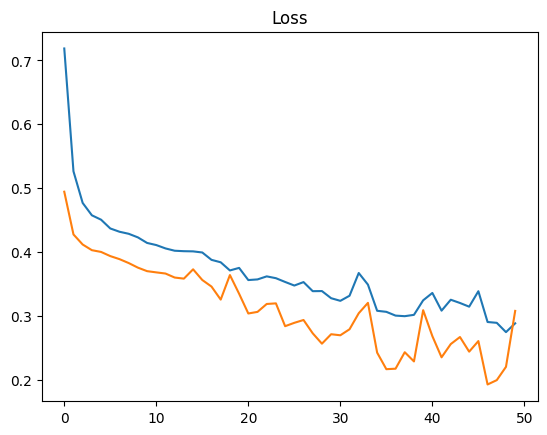

In [63]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.show()

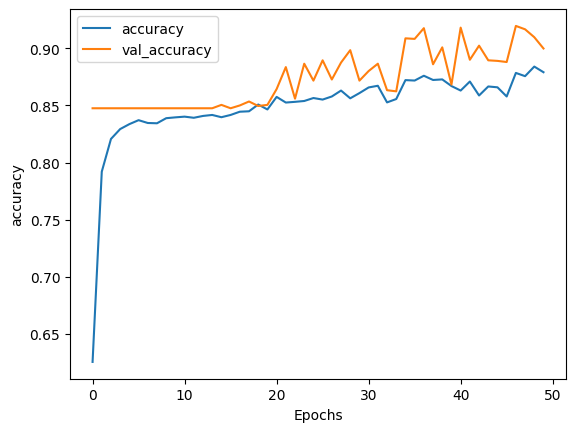

In [64]:
plot_history_train(history, 'accuracy')

In [65]:
model.evaluate(X_test,y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.8974 - loss: 0.3212


[0.3078807294368744, 0.899802565574646]

In [66]:
pred=model.predict(X_test)
y_pred_classes = (pred > 0.5).astype(int).reshape(-1)  # Umbral de 0.5 para la clasificación binaria
y_pred_classes

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([1, 1, 1, ..., 1, 1, 1])

Con el feature engineering hemos mejorado el accuracy en test de 88.9 a 91.7 lo cual es una mejora considerable. Sin embargo, si hacemos una matriz de confusion vemos que se equivoca a menudo prediciendo como 0 cuando es 1.

[[ 111  198]
 [   5 1712]]


<Axes: >

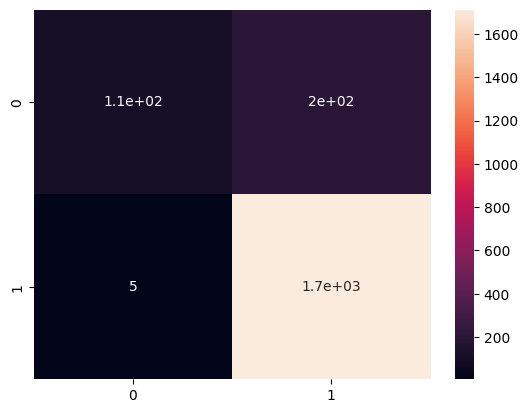

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
sns.heatmap(cm,annot=True)